In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 통계적 모형
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 머신러닝
from sklearn import datasets
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error

In [2]:
rawData = pd.read_csv('C:/Users/scien/Videos/toyota/ToyotaCorolla.csv')

In [3]:
rawData.Fuel_Type.unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [4]:
# one-hot encoding
pd.get_dummies(rawData.Fuel_Type, drop_first=True)

,Diesel,Petrol
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1431,0,1
1432,0,1
1433,0,1
1434,0,1


In [5]:
# one-hot encoding
rawData[['Diesel', 'petrol']] = pd.get_dummies(rawData.Fuel_Type, drop_first=True)

In [6]:
rawData.drop(columns=['Model', 'Fuel_Type', 'Id'], inplace=True)

In [7]:
rawData

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Diesel,petrol
0,13500,23,10,2002,46986,90,1,0,2000,3,...,1,0,0,0,1,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,1,0,0,0,1,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,1,0,0,0,1,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,1,0,0,0,1,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,86,1,0,1300,3,...,1,0,1,1,1,0,0,0,0,1
1432,10845,72,9,1998,19000,86,0,0,1300,3,...,1,0,0,1,1,0,0,0,0,1
1433,8500,71,10,1998,17016,86,0,0,1300,3,...,1,0,0,0,1,0,0,0,0,1
1434,7250,70,11,1998,16916,86,1,0,1300,3,...,0,0,0,0,1,0,0,0,0,1


In [8]:
y = rawData[['Price']]
x = rawData.loc[:, 'Age_08_04':]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=123)

In [9]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1005, 35) (431, 35) (1005, 1) (431, 1)


In [10]:
full_model = sm.OLS(y_train, x_train).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     324.5
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        10:31:58   Log-Likelihood:                -8401.2
No. Observations:                1005   AIC:                         1.687e+04
Df Residuals:                     971   BIC:                         1.704e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_08_04         -112.1936      3.946    -28.431      0.000    -119.938    -104.450
Mfg_Month          -90.2229     10.368     -8.702      0.000    -110.569     -69.877
Mfg_Year            -5.2839      1.021     -5.177      0.000      -7.287      -3.281
KM                  -0.0145      0.001    -11.391      0.000      -0.017      -0.012
HP                   3.8344      3.851      0.996      0.320      -3.723      11.391
Met_Color          -19.6260     76.048     -0.258      0.796    -168.862     129.610
Automatic           23.8122    155.985      0.153      0.879    -282.295     329.919
cc                  -0.1022      0.074     -1.377      0.169      -0.248       0.043
Doors             -140.4004     43.116     -3.256      0.001    -225.013     -55.788
Cylinders           -0.0442      0.002    -18.047      0.000      -0.049      -0.039
Gears              240.8433    188.814      1.276      0.202    -129.687     611.373
Quarterly_Tax       17.4545      1.916      9.111      0.000      13.695      21.214
Weight              22.2142      1.860     11.942      0.000      18.564      25.865
Mfr_Guarantee      301.5499     73.619      4.096      0.000     157.079     446.021
BOVAG_Guarantee    473.3269    134.222      3.526      0.000     209.928     736.726
Guarantee_Period    66.3951     15.753      4.215      0.000      35.482      97.308
ABS                -44.4248    132.412     -0.336      0.737    -304.271     215.421
Airbag_1           -27.2451    255.398     -0.107      0.915    -528.442     473.951
Airbag_2          -169.0679    136.072     -1.242      0.214    -436.097      97.961
Airco              180.8672     89.123      2.029      0.043       5.971     355.764
Automatic_airco   2218.3108    199.665     11.110      0.000    1826.486    2610.136
Boardcomputer     -320.1483    117.024     -2.736      0.006    -549.798     -90.499
CD_Player          231.6896    100.592      2.303      0.021      34.288     429.091
Central_Lock      -116.3403    137.768     -0.844      0.399    -386.697     154.017
Powered_Windows    414.4601    139.246      2.976      0.003     141.203     687.717
Power_Steering     -53.2049    282.988     -0.188      0.851    -608.543     502.133
Radio              647.5105    624.960      1.036      0.300    -578.917    1873.937
Mistlamps          -55.6615    110.671     -0.503      0.615    -272.843     161.520
Sport_Model         65.3295     90.939      0.718      0.473    -113.130     243.789
Backseat_Divider  -219.4480    129.144     -1.699      0.090    -472.882      33.986
Metallic_Rim        97.5728     95.773      1.019      0.309     -90.373     285.518
Radio_cassette    -744.8081    624.906     -1.192      0.234   -1971.131     481.514
Tow_Bar           -261.0994     79.502     -3.284      0.001    -417.116    -105.083
Diesel            -517.

In [11]:
full_model_train_predict = full_model.predict(x_train)

In [12]:
pd.concat([y_train, full_model_train_predict], axis=1)

,Price,0
584,10500,10636.916926
1140,6750,6349.387502
417,10950,11077.768775
317,10950,11700.345163
1065,6550,5776.678278
...,...,...
1041,10900,10409.376393
1122,7460,8286.238088
1346,7950,7824.165829
1406,8950,8723.382518


findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans.


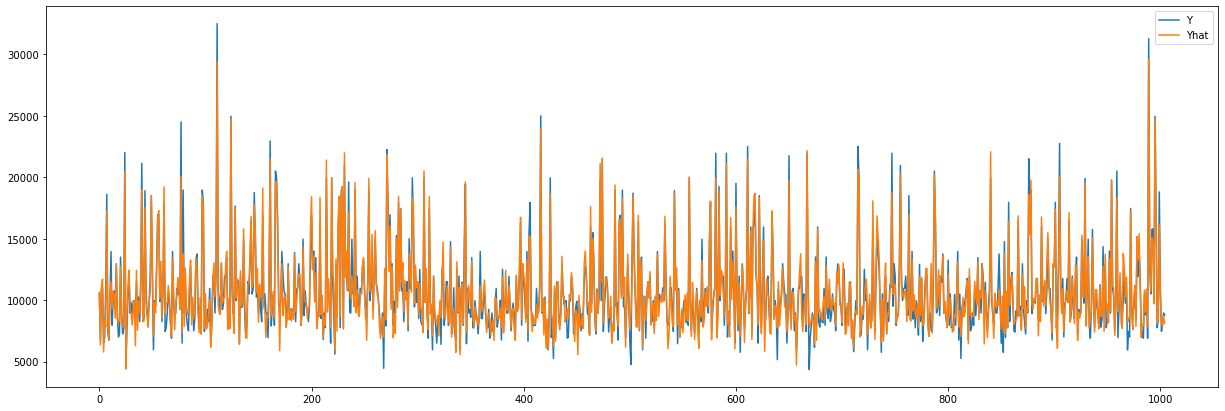

In [13]:
plt.figure(figsize=(21, 7))
plt.plot(np.array(y_train), label='Y')
plt.plot(np.array(full_model_train_predict), label='Yhat')
plt.legend()
plt.show()

In [14]:
mean_absolute_error(y_true=y_train, y_pred=full_model_train_predict)

779.9004673050647

In [15]:
full_model_test_predict = full_model.predict(x_test)

In [16]:
pd.concat([y_test, full_model_test_predict], axis=1)

,Price,0
585,12950,12391.057010
61,16500,18024.876279
919,9900,10394.476115
624,7950,9747.041849
36,15950,15667.832742
...,...,...
30,12950,15364.080317
580,11930,10697.250694
1338,7499,7751.803061
1272,8450,8979.017866


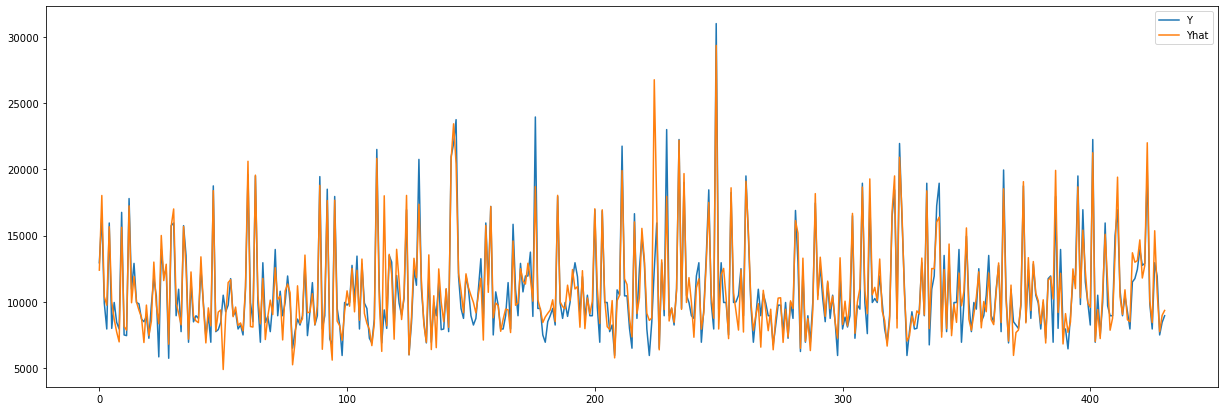

In [17]:
plt.figure(figsize=(21, 7))
plt.plot(np.array(y_test), label='Y')
plt.plot(np.array(full_model_test_predict), label='Yhat')
plt.legend()
plt.show()

In [18]:
mean_absolute_error(y_true=y_test, y_pred=full_model_test_predict)

873.249743933879

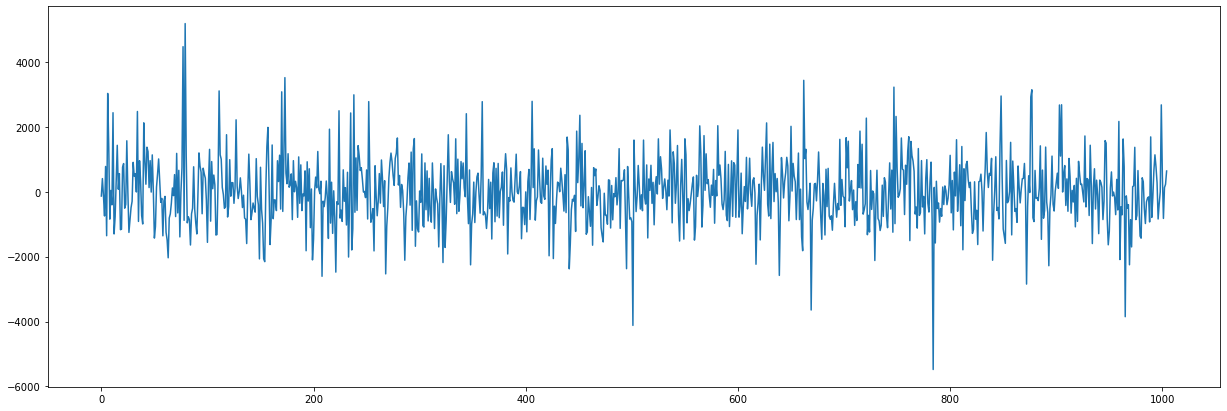

In [19]:
plt.figure(figsize=(21,7))
plt.plot(np.array(full_model.resid))
plt.show()

In [26]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(rawDataVif1.iloc[:,1:].values, i) for i in range(0, rawData.iloc[:,1:].shape[1])]
vif['Feature'] = rawData.iloc[:,1:].columns
vif

IndexError: index 20 is out of bounds for axis 1 with size 20

In [27]:
vif = pd.DataFrame()
# 변수가 높은 애들은 뽑아준다. 
rawDataVif1 = rawData.drop(columns=['Price',  'Radio', 'Radio_cassette', 'Mfg_Month', 'Mfg_Year', 'Age_08_04', 'Cylinders', 'Weight','Gears'
                                  ,'HP','Power_Steering','petrol', 'Airbag_1', 'Quarterly_Tax','Doors'])
vif['VIF Factor'] = [variance_inflation_factor(rawDataVif1.iloc.values, i) for i in range(0, rawDataVif1.shape[1])]
vif['Feature'] = rawDataVif1.columns
vif

AttributeError: '_iLocIndexer' object has no attribute 'values'

In [ ]:
vif = pd.DataFrame()
# 변수가 높은 애들은 뽑아준다. 
rawDataVif2 = rawData.drop(columns=[
    'Price',  'Radio', 'Radio_cassette'
])
vif['VIF Factor'] = [variance_inflation_factor(rawDataVif.iloc[:,1:].values, i) for i in range(0, rawDataVif2.shape[1])]
vif['Feature'] = rawDataVif2.columns
vif

In [ ]:
rawDataVif2.info()

In [ ]:
rawDataVif1.info()

In [ ]:
variance_inflation_factor(rawData.iloc[:,1:].values, 34)

In [ ]:
rawData.iloc[:,1:].shape

In [ ]:
# y값에 해당되는 Price를 제외한 전체 값(x값) 출력
rawData.iloc[:,1:].values

In [ ]:
vif = pd.DataFrame()
# 변수가 높은 애들은 뽑아준다. 
rawDataVif1 = rawData.drop(columns=['Price',  'Radio', 'Radio_cassette', 'Mfg_Month', 'Mfg_Year', 'Age_08_04', 'Cylinders', 'Weight','Gears'
                                  ,'HP','Power_Steering','Petrol', 'Airbag_1', 'Quarterly_Tax','Doors'])
vif['VIF Factor'] = [variance_inflation_factor(rawDataVif.iloc[:,1:].values, i) for i in range(0, rawDataVif1.shape[1])]
vif['Feature'] = rawDataVif1.columns
vif

vif = pd.DataFrame()
# 변수가 높은 애들은 뽑아준다. 
rawDataVif2 = rawData.drop(columns=[
    'Price',  'Radio', 'Radio_cassette'
])
vif['VIF Factor'] = [variance_inflation_factor(rawDataVif.iloc[:,1:].values, i) for i in range(0, rawDataVif2.shape[1])]
vif['Feature'] = rawDataVif2.columns
vif

rawDataVif2.info()

rawDataVif1.info()

variance_inflation_factor(rawData.iloc[:,1:].values, 34)

rawData.iloc[:,1:].shape

# y값에 해당되는 Price를 제외한 전체 값(x값) 출력
rawData.iloc[:,1:].values